In [1]:
import torch
torch.__version__

ImportError: /home/quentin/miniconda3/lib/python3.6/site-packages/torch/_C.cpython-36m-x86_64-linux-gnu.so: undefined symbol: cuGetErrorString

In [1]:
from conv_models import Net

In [2]:
model = Net()

In [5]:
model.fit(x_train, y_train)

AttributeError: 'Variable' object has no attribute 'item'

# Baseline models performances

In this notebook are trained the baseline models and we use cross-validation to get the best hyper-parameters.

https://stats.stackexchange.com/questions/91290/how-do-i-train-hmms-for-classification

In [2]:
import numpy as np

from loading_helper import load_data
from baseline_model import BaselineModel

import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

ImportError: /home/quentin/miniconda3/lib/python3.6/site-packages/torch/_C.cpython-36m-x86_64-linux-gnu.so: undefined symbol: cuGetErrorString

In [3]:
import torch
torch.__version__

ImportError: /home/quentin/miniconda3/lib/python3.6/site-packages/torch/_C.cpython-36m-x86_64-linux-gnu.so: undefined symbol: cuGetErrorString

In [ ]:
one_khz = False

x_train, y_train = load_data(one_khz=one_khz)
x_test, y_test = load_data(train=False, one_khz=one_khz)

## Logistic regression

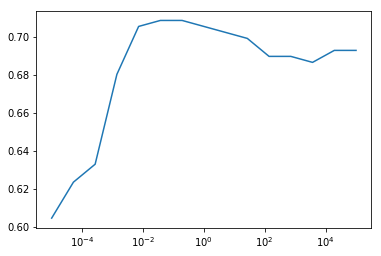

In [3]:
model = BaselineModel(model='logistic')

params = dict(C=np.logspace(-5, 5, 15))

clf = model.tune_params(params, x_train, y_train)

plt.semilogx(params['C'], clf.cv_results_['mean_test_score'])

In [3]:
model = BaselineModel(model='logistic')

params = dict(C=np.logspace(-5, 5, 15))

clf = model.tune_params(params, x_train, y_train)

#plt.semilogx(params['C'], clf.cv_results_['mean_test_score'])

In [4]:
clf

<function sklearn.pipeline.Pipeline.score>

## Support vector machines

In [ ]:
model = BaselineModel(model='svm')

params = dict(C=np.logspace(-5, 5, 15))

clf = model.tune_params(params, x_train, y_train)

plt.semilogx(params['C'], clf.cv_results_['mean_test_score'])

## Random forest

In [ ]:
model = BaselineModel(model='forest')

params = dict(C=np.logspace(-5, 5, 15))

clf = model.tune_params(params, x_train, y_train)

plt.semilogx(params['C'], clf.cv_results_['mean_test_score'])

In [31]:
model = BaselineModel(model='svm', kernel='linear', C=1)
model.fit(x_train, y_train)

In [32]:
y_hat = model.predict(x_test)

print('Accuracy : {}%'.format(100*sum(y_hat == y_test)/len(y_test)))

Accuracy : 74.0%


In [34]:
BaselineModel(model='svm', kernel='linear').cross_validation(x_train, y_train)

(0.6805779569892472, 0.02674447292179724)

In [3]:
model = BaselineModel(model='svm', kernel='linear', C=1)
model.fit(x_train, y_train)

y_hat = model.predict(x_test)

print('Accuracy : {}%'.format(100*sum(y_hat == y_test)/len(y_test)))

Accuracy : 49.0%


In [4]:
BaselineModel(model='svm', kernel='linear').cross_validation(x_train, y_train)

(0.6774529569892472, 0.030106129991208465)

In [14]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

data = x_train.view(x_train.shape[0], -1)
data = data.numpy().astype(float)

targets = y_train.numpy().astype(float)

scalar = preprocessing.StandardScaler()
clf = SVC(kernel='linear')

pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

cv = KFold(n_splits=4)
scores = cross_val_score(pipeline, data, targets, cv = cv)

In [15]:
scores

array([0.67088608, 0.69620253, 0.6835443 , 0.67088608])

# HMM

In [1]:
from __future__ import print_function

import datetime

import numpy as np

In [165]:
from hmmlearn.hmm import GaussianHMM
from hmmlearn.hmm import MultinomialHMM
from hmmlearn.hmm import GMMHMM

In [4]:
import matplotlib

data = x_train.view(x_train.shape[0], -1)
data = data.numpy().astype(float)

targets = y_train.numpy()

In [108]:
model = GaussianHMM(n_components=2, n_iter=10000).fit(data)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(data)

print('Accuracy : {}%'.format(100*sum(hidden_states == targets)/len(targets)))

Accuracy : 49.36708860759494%


/home/quentin/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
print("Transition matrix")
print(model.transmat_)
print()

Transition matrix
[[0.17283951 0.33333333 0.39506173 0.09876543]
 [0.31111111 0.26666667 0.3        0.12222222]
 [0.26956522 0.28695652 0.4        0.04347826]
 [0.27586207 0.20689655 0.34482759 0.17241379]]



In [24]:
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
print()

Means and vars of each hidden state
0th hidden state
mean =  [ 70.79259264  67.9592593   67.23827165 ... -11.51975316 -11.58765424
 -10.71851848]
var =  [676.95019117 783.98648428 637.20914924 ... 368.14491927 387.9335433
 438.04657025]
1th hidden state
mean =  [78.21868144 79.90439585 78.36593439 ... 39.00659333 39.96593421
 40.77032968]
var =  [450.54382827 536.30998452 547.24786278 ... 542.57106365 420.11532134
 515.49912092]
2th hidden state
mean =  [73.5165215  74.17391316 73.16695635 ... 14.76521739 14.15391314
 12.53739129]
var =  [585.12562052 540.66096498 603.60872587 ... 268.94479258 329.90205565
 368.99547086]
3th hidden state
mean =  [ 61.84137897  61.94827554  60.71034415 ... -51.71034475 -50.67586164
 -51.60344824]
var =  [1719.59449654 1972.57524108 2068.30190365 ...  848.705371    904.88490597
 1002.65791901]



## BIG TEST

In [114]:
index0 = np.where(targets == 0)[0]
index1 = np.where(targets == 1)[0]

data0 = data[index0]
data1 = data[index1]

In [117]:
data1.shape

(157, 1400)

In [168]:
model0 = GMMHMM(n_components=3).fit(data0)
model1 = GMMHMM(n_components=3).fit(data1)

# Predict the optimal sequence of internal hidden state
hidden_states = model0.predict(data)

In [174]:
hidden_states.shape

(316,)

In [169]:
res = []
for x in data1:
    res.append(0 if model0.score([x]) > model1.score([x]) else 1)
res = np.array(res)

In [172]:
sum(res == 0)/len(data1)

0.6942675159235668

In [160]:
res

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0])

In [164]:
import hmmlearn
help(hmmlearn.hmm)

Help on module hmmlearn.hmm in hmmlearn:

NAME
    hmmlearn.hmm - The :mod:`hmmlearn.hmm` module implements hidden Markov models.

CLASSES
    hmmlearn.base._BaseHMM(sklearn.base.BaseEstimator)
        GMMHMM
        GaussianHMM
        MultinomialHMM
    
    class GMMHMM(hmmlearn.base._BaseHMM)
     |  Hidden Markov Model with Gaussian mixture emissions.
     |  
     |  Parameters
     |  ----------
     |  n_components : int
     |      Number of states in the model.
     |  
     |  n_mix : int
     |      Number of states in the GMM.
     |  
     |  covariance_type : string, optional
     |      String describing the type of covariance parameters to
     |      use.  Must be one of
     |  
     |      * "spherical" --- each state uses a single variance value that
     |        applies to all features.
     |      * "diag" --- each state uses a diagonal covariance matrix.
     |      * "full" --- each state uses a full (i.e. unrestricted)
     |        covariance matrix.
     | 